<a href="https://colab.research.google.com/github/ccwu0918/OpenVINOColabDemo/blob/main/401_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Openvino Environment Test 

In [1]:
!cpuinfo

/bin/bash: cpuinfo: command not found


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


# Google Colab with OpenVINO


In [3]:
# !wget https://github.com/ccwu0918/OpenVINOColabDemo/raw/main/omz_demos_build.zip
# !unzip ./omz_demos_build.zip -d /content/

In [4]:
# !pip install openvino==2022.1.0

In [5]:
# !pip install openvino-dev==2022.1.0
# !pip install openvino-dev[caffe,kaldi,pytorch,mxnet,onnx,tensorflow2]==2022.1.0
# !pip install openvino-dev[pytorch,tensorflow2]==2022.1.0
# !pip install openvino-dev[tensorflow2]==2022.1.0

In [6]:
# !wget https://registrationcenter-download.intel.com/akdlm/irc_nas/18617/l_openvino_toolkit_p_2022.1.0.643_offline.sh
# !chmod +x l_openvino_toolkit_p_2022.1.0.643_offline.sh 
# !./l_openvino_toolkit_p_2022.1.0.643_offline.sh  -a -s --eula accept && rm ./l_openvino_toolkit_p_2022.1.0.643_offline.sh # --help
# !ln /opt/intel/openvino_2022.1.0.643 /content/openvino_2022 -s

In [7]:
# !sudo -E /opt/intel/openvino_2022/install_dependencies/install_openvino_dependencies.sh

# Install OpenVINO™ Notebooks


In [8]:
%cd /content
!git clone https://github.com/openvinotoolkit/openvino_notebooks.git # --depth=1

/content
Cloning into 'openvino_notebooks'...
remote: Enumerating objects: 2656, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 2656 (delta 19), reused 26 (delta 6), pack-reused 2599
Receiving objects: 100% (2656/2656), 188.05 MiB | 31.83 MiB/s, done.
Resolving deltas: 100% (1534/1534), done.


In [9]:
!pip install --upgrade -r ./openvino_notebooks/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Ignoring torch: markers 'sys_platform == "darwin"' don't match your environment
Ignoring torchvision: markers 'sys_platform == "darwin"' don't match your environment
     |████████████████████████████████| 5.8 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 123 kB 46.0 MB/s 
     |████████████████████████████████| 159.4 MB 33 kB/s 
     |████████████████████████████████| 11.8 MB 40.1 MB/s 
     |████████████████████████████████| 332 kB 51.8 MB/s 
     |████████████████████████████████| 108.4 MB 1.2 MB/s 
     |████████████████████████████████| 212 kB 54.4 MB/s 
     |████████████████████████████████| 2.7 MB 51.4 MB/s 
     |█████████████

In [10]:
!source /opt/intel/openvino_2022/setupvars.sh

/bin/bash: /opt/intel/openvino_2022/setupvars.sh: No such file or directory


# Install Open Model Zoo

In [11]:
%cd /content
!git clone https://github.com/openvinotoolkit/open_model_zoo.git
%cd ./open_model_zoo
!git submodule update --init --recursive
%cd /content

/content
Cloning into 'open_model_zoo'...
remote: Enumerating objects: 96248, done.
remote: Total 96248 (delta 0), reused 0 (delta 0), pack-reused 96248
Receiving objects: 100% (96248/96248), 281.37 MiB | 24.76 MiB/s, done.
Resolving deltas: 100% (65409/65409), done.
Checking out files: 100% (2620/2620), done.
/content/open_model_zoo
Submodule 'demos/thirdparty/gflags' (https://github.com/gflags/gflags.git) registered for path 'demos/thirdparty/gflags'
Cloning into '/content/open_model_zoo/demos/thirdparty/gflags'...
Submodule path 'demos/thirdparty/gflags': checked out 'e171aa2d15ed9eb17054558e0b3a6a413bb01067'
Submodule 'doc' (https://github.com/gflags/gflags.git) registered for path 'demos/thirdparty/gflags/doc'
Cloning into '/content/open_model_zoo/demos/thirdparty/gflags/doc'...
Submodule path 'demos/thirdparty/gflags/doc': checked out '8411df715cf522606e3b1aca386ddfc0b63d34b4'
/content


In [12]:
# !python -mpip install --user -r ./open_model_zoo/demos/requirements.txt

In [13]:
# !pip install /content/open_model_zoo/demos/common/python


# Install OpenCV

In [14]:
# !sudo -E /opt/intel/openvino_2022/extras/scripts/download_opencv.sh

In [ ]:
# !python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

# Live Object Detection with OpenVINO

This notebook demonstrates live object detection with OpenVINO. We use the [SSDLite MobileNetV2](https://github.com/openvinotoolkit/open_model_zoo/tree/master/models/public/ssdlite_mobilenet_v2) from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/). At the bottom of this notebook, you will see live inference results from your webcam. You can also upload a video file.

> Note: _To use this notebook with a webcam, you need to run the notebook on a computer with a webcam. If you run the notebook on a server, the webcam will not work. You can still do inference on a video._

## Imports

In [15]:
import collections
import os
import sys
import time

import cv2
import numpy as np
# from IPython import display
from openvino.runtime import Core
###
from google.colab.patches import cv2_imshow # Google Colab CV2
import matplotlib.pyplot as plt
# from IPython.display import display, Image, clear_output
from IPython import display

# sys.path.append("../utils") -->
sys.path.append("/content/openvino_notebooks/notebooks/utils")
import notebook_utils as utils

## The Model

### Download the Model

We use `omz_downloader`, which is a command-line tool from the `openvino-dev` package. `omz_downloader` automatically creates a directory structure and downloads the selected model. This step is skipped if the model is already downloaded. The selected model comes from the public directory, which means it must be converted into Intermediate Representation (IR).

If you want to download another model (`ssdlite_mobilenet_v2`, `ssd_mobilenet_v1_coco`, `ssd_mobilenet_v2_coco`, `ssd_resnet50_v1_fpn_coco`, `ssd_mobilenet_v1_fpn_coco`) , please change the model name. *Note: Using a model outside the list can require different pre- and post-processing.*

In [16]:
# directory where model will be downloaded
# base_model_dir = "model" -->
base_model_dir = "/content/open_model_zoo/models"

# model name as named in Open Model Zoo
model_name = "ssdlite_mobilenet_v2"

download_command = f"omz_downloader " \
                   f"--name {model_name} " \
                   f"--output_dir {base_model_dir} " \
                   f"--cache_dir {base_model_dir}"
! $download_command

################|| Downloading ssdlite_mobilenet_v2 ||################

========== Downloading /content/open_model_zoo/models/public/ssdlite_mobilenet_v2/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz
... 100%, 49829 KB, 28059 KB/s, 1 seconds passed

========== Unpacking /content/open_model_zoo/models/public/ssdlite_mobilenet_v2/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz



### Convert the Model

The pre-trained model is in TensorFlow format. To use it with OpenVINO, we need to convert it to OpenVINO IR format. To do this, we use Model Converter (`omz_converter`), which is another command-line tool from the `openvino-dev` package. If we don't specify a precision, the model will be converted many times to all available precisions (FP32 and FP16 in this case). Every conversion should take up to 2 minutes. If the model has been already converted, this step is skipped.
*Note: Each model may have different precisions available*

In [17]:
precision = "FP16"

# output path for the conversion
# converted_model_path = f"model/public/{model_name}/{precision}/{model_name}.xml" -->
converted_model_path = f"/content/open_model_zoo/models/public/{model_name}/{precision}/{model_name}.xml"

if not os.path.exists(converted_model_path):
    convert_command = f"omz_converter " \
                      f"--name {model_name} " \
                      f"--download_dir {base_model_dir} " \
                      f"--precisions {precision}"
    ! $convert_command

========== Converting ssdlite_mobilenet_v2 to IR (FP16)
Conversion command: /usr/bin/python3 -- /usr/local/bin/mo --framework=tf --data_type=FP16 --output_dir=/content/open_model_zoo/models/public/ssdlite_mobilenet_v2/FP16 --model_name=ssdlite_mobilenet_v2 --input=image_tensor --reverse_input_channels --output=detection_scores,detection_boxes,num_detections --transformations_config=/usr/local/lib/python3.7/dist-packages/openvino/tools/mo/front/tf/ssd_v2_support.json --tensorflow_object_detection_api_pipeline_config=/content/open_model_zoo/models/public/ssdlite_mobilenet_v2/ssdlite_mobilenet_v2_coco_2018_05_09/pipeline.config --input_model=/content/open_model_zoo/models/public/ssdlite_mobilenet_v2/ssdlite_mobilenet_v2_coco_2018_05_09/frozen_inference_graph.pb '--layout=image_tensor(NHWC)' '--input_shape=[1, 300, 300, 3]'

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/open_model_zoo/models/public/ssdlite_mobilenet_v2/ssdlite_mobilenet_v2_coco_2018_05

### Load the Model

Downloaded models are located in a fixed structure, which indicates vendor (intel or public), model name and precision.

Only a few lines of code are required to run the model. First, we create an Inference Engine. Then we read the network architecture and model weights from the .bin and .xml files to compile for the desired device. If you choose `GPU` you need to wait for a while, as the startup time is much longer than in the case of `CPU`.

There is a possibility to allow OpenVINO to decide which hardware offers the best performance. In that case, just use `AUTO`. Remember that for most cases the best hardware is `GPU` (better performance, but longer startup time).

In [18]:
# initialize inference engine
ie_core = Core()
# read the network and corresponding weights from file
model = ie_core.read_model(model=converted_model_path)
# compile the model for the CPU (you can choose manually CPU, GPU, MYRIAD etc.)
# or let the engine choose the best available device (AUTO)
compiled_model = ie_core.compile_model(model=model, device_name="CPU")

# get input and output nodes
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

# get input size
height, width = list(input_layer.shape)[1:3]

Input and output layers have the names of the input node and output node respectively. In the case of the SSDLite MobileNetV2, we have one input and one output.

In [19]:
input_layer.any_name, output_layer.any_name

('image_tensor', 'detection_boxes')

## Processing

### Process Results

Firstly, we list all available classes and create colors for them. Then, in the post-process stage, we transform boxes with normalized coordinates `[0, 1]` into boxes with pixel coordinates `[0, image_size_in_px]`. Afterward, we use [non-maximum suppression](https://paperswithcode.com/method/non-maximum-suppression) to reject overlapping detections and those below the probability threshold (0.5). Finally, we draw boxes and labels inside them.

In [20]:
# https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/
classes = [
    "background", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
    "truck", "boat", "traffic light", "fire hydrant", "street sign", "stop sign",
    "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant",
    "bear", "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe", "eye glasses",
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite",
    "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle",
    "plate", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
    "couch", "potted plant", "bed", "mirror", "dining table", "window", "desk", "toilet",
    "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven",
    "toaster", "sink", "refrigerator", "blender", "book", "clock", "vase", "scissors",
    "teddy bear", "hair drier", "toothbrush", "hair brush"
]

# colors for above classes (Rainbow Color Map)
colors = cv2.applyColorMap(
    src=np.arange(0, 255, 255 / len(classes), dtype=np.float32).astype(np.uint8),
    colormap=cv2.COLORMAP_RAINBOW,
).squeeze()


def process_results(frame, results, thresh=0.6):
    # size of the original frame
    h, w = frame.shape[:2]
    # results is a tensor [1, 1, 100, 7]
    results = results.squeeze()
    boxes = []
    labels = []
    scores = []
    for _, label, score, xmin, ymin, xmax, ymax in results:
        # create a box with pixels coordinates from the box with normalized coordinates [0,1]
        boxes.append(
            tuple(map(int, (xmin * w, ymin * h, (xmax - xmin) * w, (ymax - ymin) * h)))
        )
        labels.append(int(label))
        scores.append(float(score))

    # apply non-maximum suppression to get rid of many overlapping entities
    # see https://paperswithcode.com/method/non-maximum-suppression
    # this algorithm returns indices of objects to keep
    indices = cv2.dnn.NMSBoxes(
        bboxes=boxes, scores=scores, score_threshold=thresh, nms_threshold=0.6
    )

    # if there are no boxes
    if len(indices) == 0:
        return []

    # filter detected objects
    return [(labels[idx], scores[idx], boxes[idx]) for idx in indices.flatten()]


def draw_boxes(frame, boxes):
    for label, score, box in boxes:
        # choose color for the label
        color = tuple(map(int, colors[label]))
        # draw box
        x2 = box[0] + box[2]
        y2 = box[1] + box[3]
        cv2.rectangle(img=frame, pt1=box[:2], pt2=(x2, y2), color=color, thickness=3)

        # draw label name inside the box
        cv2.putText(
            img=frame,
            text=f"{classes[label]} {score:.2f}",
            org=(box[0] + 10, box[1] + 30),
            fontFace=cv2.FONT_HERSHEY_COMPLEX,
            fontScale=frame.shape[1] / 1000,
            color=color,
            thickness=1,
            lineType=cv2.LINE_AA,
        )

    return frame

### Main Processing Function

Run object detection on the specified source. Either a webcam or a video file.

In [32]:
# main processing function to run object detection
def run_object_detection(source=0, flip=False, use_popup=False, skip_first_frames=0):
    player = None
    ind = 0
    try:
        # create video player to play with target fps
        player = utils.VideoPlayer(
            source=source, flip=flip, fps=30, skip_first_frames=skip_first_frames
        )
        # start capturing
        player.start()
        if use_popup:
            title = "Press ESC to Exit"
            cv2.namedWindow(
                winname=title, flags=cv2.WINDOW_GUI_NORMAL | cv2.WINDOW_AUTOSIZE
            )

        processing_times = collections.deque()
        while True:
            # grab the frame
            frame = player.next()
            if frame is None:
                print("Source ended")
                break
            # if frame larger than full HD, reduce size to improve the performance
            scale = 1280 / max(frame.shape)
            if scale < 1:
                frame = cv2.resize(
                    src=frame,
                    dsize=None,
                    fx=scale,
                    fy=scale,
                    interpolation=cv2.INTER_AREA,
                )

            # resize image and change dims to fit neural network input
            input_img = cv2.resize(
                src=frame, dsize=(width, height), interpolation=cv2.INTER_AREA
            )
            # create batch of images (size = 1)
            input_img = input_img[np.newaxis, ...]

            # measure processing time

            start_time = time.time()
            # get results
            results = compiled_model([input_img])[output_layer]
            stop_time = time.time()
            # get poses from network results
            boxes = process_results(frame=frame, results=results)

            # draw boxes on a frame
            frame = draw_boxes(frame=frame, boxes=boxes)

            processing_times.append(stop_time - start_time)
            # use processing times from last 200 frames
            if len(processing_times) > 200:
                processing_times.popleft()

            _, f_width = frame.shape[:2]
            # mean processing time [ms]
            processing_time = np.mean(processing_times) * 1000
            fps = 1000 / processing_time
            cv2.putText(
                img=frame,
                text=f"Inference time: {processing_time:.1f}ms ({fps:.1f} FPS)",
                org=(20, 40),
                fontFace=cv2.FONT_HERSHEY_COMPLEX,
                fontScale=f_width / 1000,
                color=(0, 0, 255),
                thickness=1,
                lineType=cv2.LINE_AA,
            )
            # print(f"Inference time: {processing_time:.1f}ms ({fps:.1f} FPS)")
            ind += 1
            # use this workaround if there is flickering
            if use_popup:
                cv2.imshow(winname=title, mat=frame)
                key = cv2.waitKey(1)
                # escape = 27
                if key == 27:
                    break
            else:
                # encode numpy array to jpg
                _, encoded_img = cv2.imencode(
                    ext=".jpg", img=frame, params=[cv2.IMWRITE_JPEG_QUALITY, 100]
                )

                # image_path = "./lena.jpeg"

                # create IPython image
                i = display.Image(data=encoded_img)
                # i = Image( data=encoded_img )
                # display the image in this notebook
                # display.clear_output(wait=True)
                # display.clear_output(wait=True)
                # display.display(i)    
                # display(i)    
                # img = plt.imread(Image.frombytes(frame), 0)

                print(str(ind)+": /content/"+str(ind)+".jpg")
                plt.imshow(frame)     
                plt.axis('off')           
                plt.show()
                # display(Image.fromarray(encoded_img))

                # cv2.imwrite("/content/"+str(ind)+".jpg", encoded_img)
                # 以OpenCV檢視輸入影像
                # img = cv2.imread(i) # 讀入指定彩色影像
                # cv2_imshow(encoded_img)  # 顯示影像            
    # ctrl-c
    except KeyboardInterrupt:
        print("Interrupted")
    # any different error
    except RuntimeError as e:
        print(e)
    finally:
        if player is not None:
            # stop capturing
            player.stop()
        if use_popup:
            cv2.destroyAllWindows()

## Run

### Run Live Object Detection

Run using a webcam as the video input. By default, the primary webcam is set with `source=0`. If you have multiple webcams, each one will be assigned a consecutive number starting at 0. Set `flip=True` when using a front-facing camera. Some web browsers, especially Mozilla Firefox, may cause flickering. If you experience flickering, set `use_popup=True`.

*Note: To use this notebook with a webcam, you need to run the notebook on a computer with a webcam. If you run the notebook on a server (e.g. Binder), the webcam will not work.*

*Note: Popup mode may not work if you run this notebook on a remote computer (e.g. Binder).*

In [22]:
run_object_detection(source=0, flip=True, use_popup=False)

Cannot open camera 0


### Run Object Detection on a Video File

If you don't have a webcam, you can still run this demo with a video file. Any [format supported by OpenCV](https://docs.opencv.org/4.5.1/dd/d43/tutorial_py_video_display.html) will work.

In [23]:
# import utils
# display = utils.notebook_init()  # checks

In [30]:
# !python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.3.4
Uninstalling matplotlib-3.3.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.4-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully un

1: /content/1.jpg


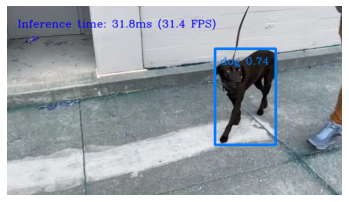

2: /content/2.jpg


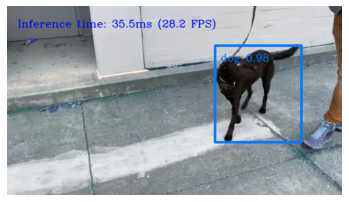

3: /content/3.jpg


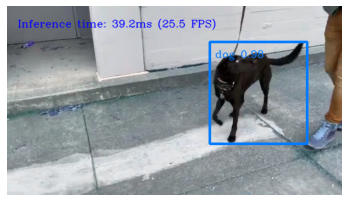

4: /content/4.jpg


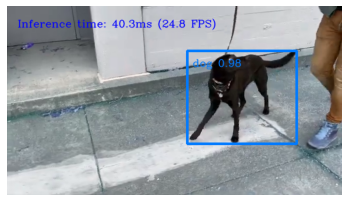

5: /content/5.jpg


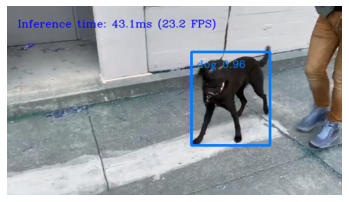

6: /content/6.jpg


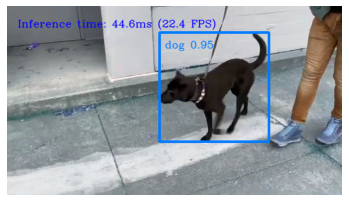

7: /content/7.jpg


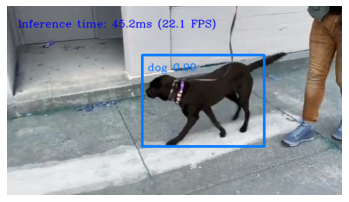

8: /content/8.jpg


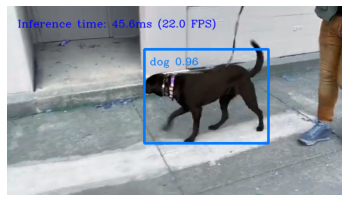

9: /content/9.jpg


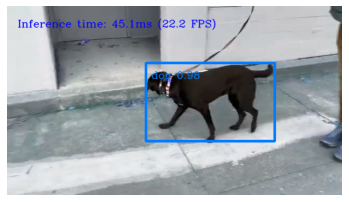

10: /content/10.jpg


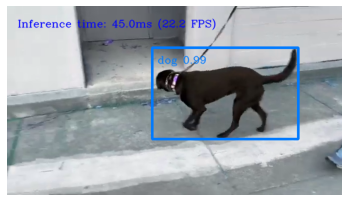

11: /content/11.jpg


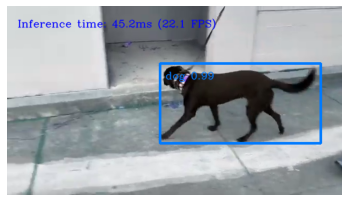

12: /content/12.jpg


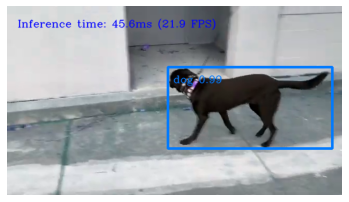

13: /content/13.jpg


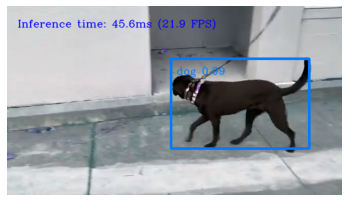

14: /content/14.jpg


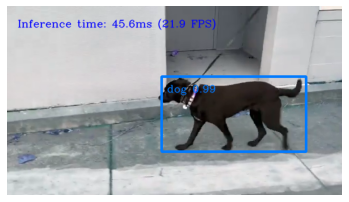

15: /content/15.jpg


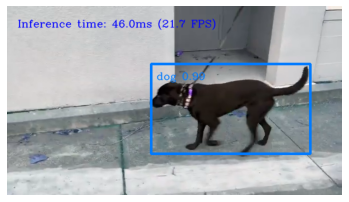

16: /content/16.jpg


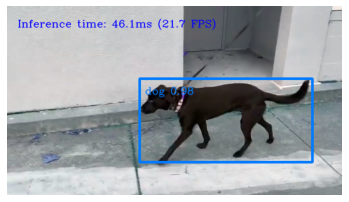

17: /content/17.jpg


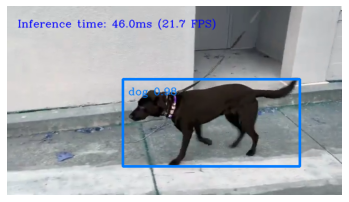

18: /content/18.jpg


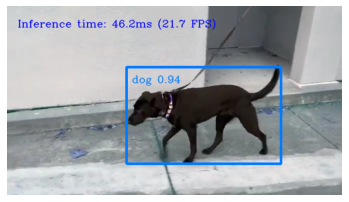

19: /content/19.jpg


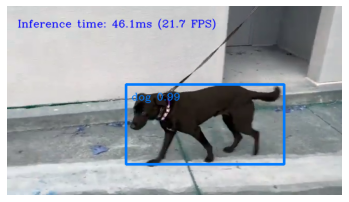

20: /content/20.jpg


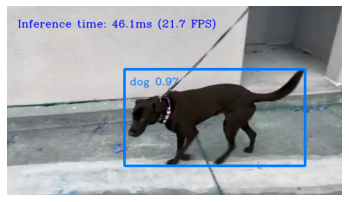

21: /content/21.jpg


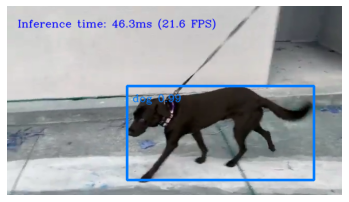

22: /content/22.jpg


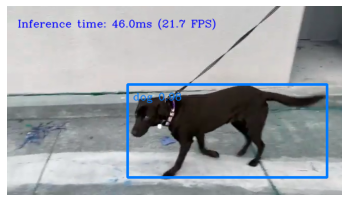

23: /content/23.jpg


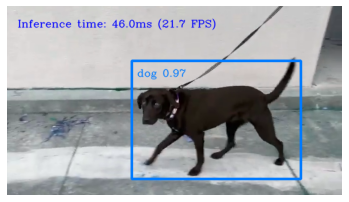

24: /content/24.jpg


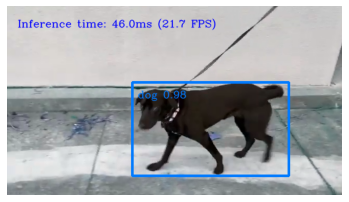

25: /content/25.jpg


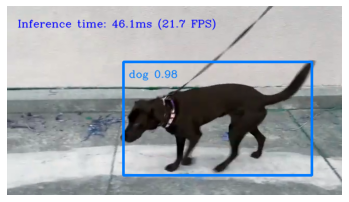

26: /content/26.jpg


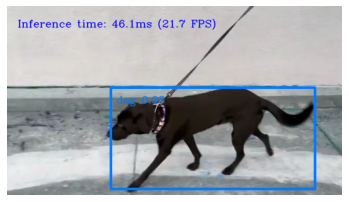

27: /content/27.jpg


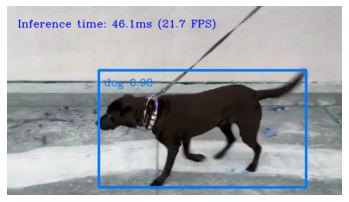

28: /content/28.jpg


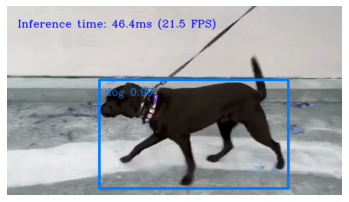

29: /content/29.jpg


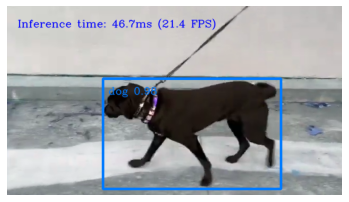

30: /content/30.jpg


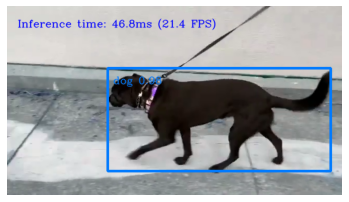

31: /content/31.jpg


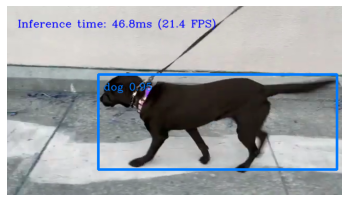

32: /content/32.jpg


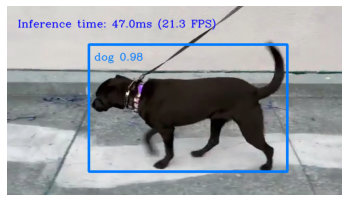

33: /content/33.jpg


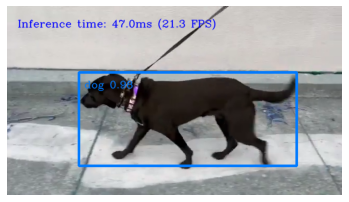

34: /content/34.jpg


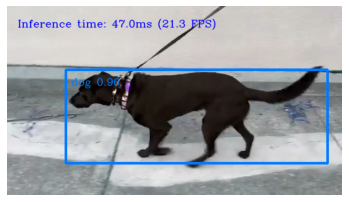

35: /content/35.jpg


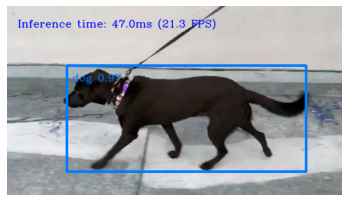

36: /content/36.jpg


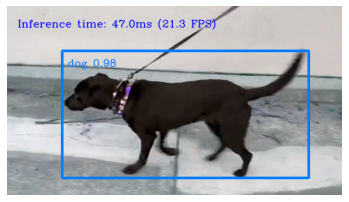

37: /content/37.jpg


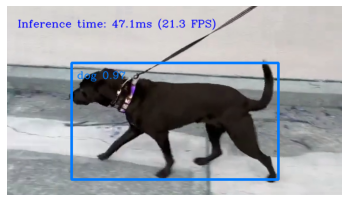

38: /content/38.jpg


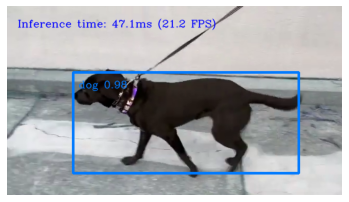

39: /content/39.jpg


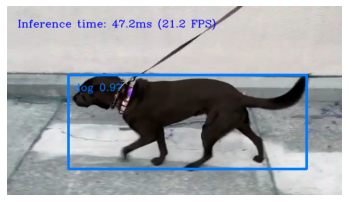

40: /content/40.jpg


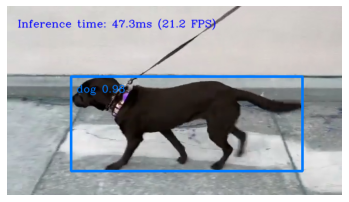

41: /content/41.jpg


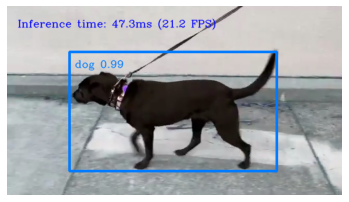

42: /content/42.jpg


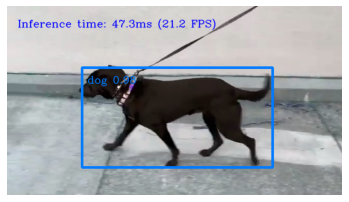

43: /content/43.jpg


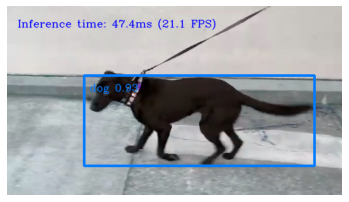

44: /content/44.jpg


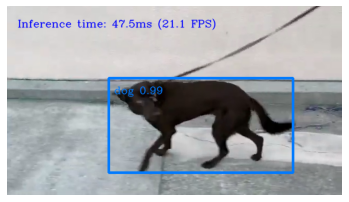

45: /content/45.jpg


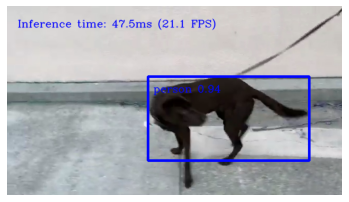

46: /content/46.jpg


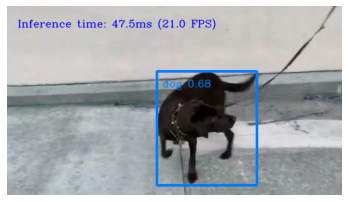

47: /content/47.jpg


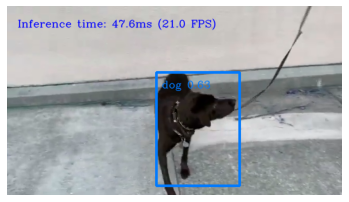

48: /content/48.jpg


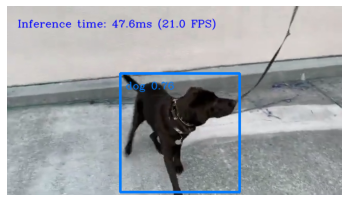

49: /content/49.jpg


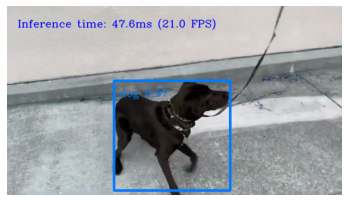

50: /content/50.jpg


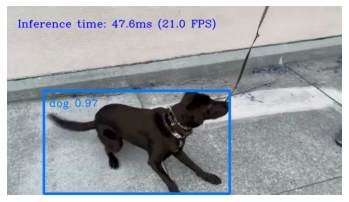

51: /content/51.jpg


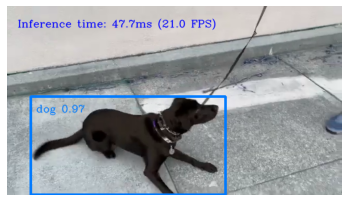

52: /content/52.jpg


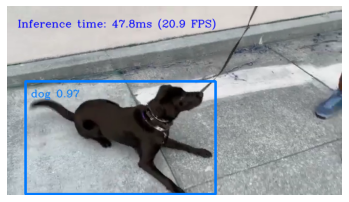

53: /content/53.jpg


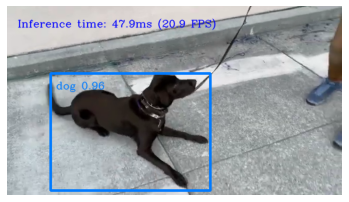

54: /content/54.jpg


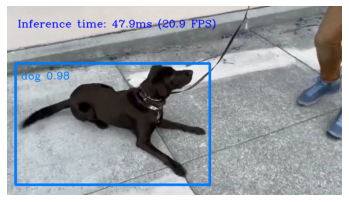

55: /content/55.jpg


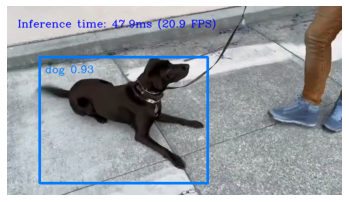

56: /content/56.jpg


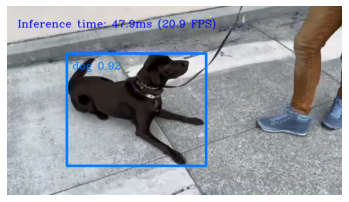

57: /content/57.jpg


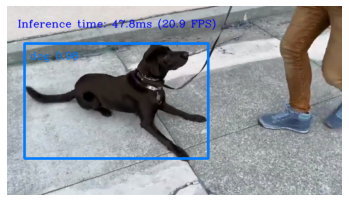

Source ended


In [33]:
%matplotlib inline
# video_file = "../201-vision-monodepth/data/Coco Walking in Berkeley.mp4" -->
video_file = "/content/openvino_notebooks/notebooks/201-vision-monodepth/data/Coco Walking in Berkeley.mp4"

run_object_detection(source=video_file, flip=False, use_popup=False)

## References

1. [SSDLite MobileNetV2](https://github.com/openvinotoolkit/open_model_zoo/tree/master/models/public/ssdlite_mobilenet_v2)
2. [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/)
3. [Non-Maximum Suppression](https://paperswithcode.com/method/non-maximum-suppression)